In [ ]:
import pandas as pd

# Load the datasets
wildfires_df = pd.read_csv('/content/Historical_Wildfires.csv')
weather_df = pd.read_csv('/content/HistoricalWeather.csv')

# Define a function to parse dates with multiple formats
def parse_dates(date_series):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_series, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.to_datetime(date_series, errors='coerce')  #Coerce any non-matching formats to NaT

# Apply the function to the 'Date' columns in both datasets
wildfires_df['Date'] = parse_dates(wildfires_df['Date'])
weather_df['Date'] = parse_dates(weather_df['Date'])

# Drop any rows with NaT in the 'Date' column if any remain
wildfires_df.dropna(subset=['Date'], inplace=True)
weather_df.dropna(subset=['Date'], inplace=True)

# Change the format to dd/mm/yyyy
wildfires_df['Date'] = wildfires_df['Date'].dt.strftime('%d/%m/%Y')
weather_df['Date'] = weather_df['Date'].dt.strftime('%d/%m/%Y')

# Save the cleaned data back to CSV if needed
wildfires_df.to_csv('Cleaned_Historical_Wildfires.csv', index=False)
weather_df.to_csv('Cleaned_HistoricalWeather.csv', index=False)

# Display the first few rows of each dataset to verify the changes
wildfires_df.head(), weather_df.head()


(  Region        Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
 0    NSW  04/01/2005              8.68000                      312.266667   
 1    NSW  05/01/2005             16.61125                      322.475000   
 2    NSW  06/01/2005              5.52000                      325.266667   
 3    NSW  07/01/2005              6.26400                      313.870000   
 4    NSW  08/01/2005              5.40000                      337.383333   
 
    Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
 0                            42.400000        78.666667        2.886751   
 1                            62.362500        85.500000        8.088793   
 2                            38.400000        78.333333        3.214550   
 3                            33.800000        92.200000        7.529940   
 4                           122.533333        91.000000        7.937254   
 
    Var_confidence  Count Replaced  
 0        8.333333      3        R 

In [ ]:
# Merge the datasets on 'Date' and 'Region'
merged_df = pd.merge(wildfires_df, weather_df, on=['Date', 'Region'], how='inner')

# Display the first few rows of the merged dataset to verify the merge
merged_df.head()


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,NSW,04/01/2005,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,R,Precipitation,800234.348986,0.000000,22.842566,2.808620,17.383363
1,NSW,04/01/2005,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,R,RelativeHumidity,800234.348986,31.279930,90.332771,57.095628,267.158378
2,NSW,04/01/2005,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,R,SoilWaterContent,800234.348986,0.022578,0.444927,0.214293,0.009965
3,NSW,04/01/2005,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,R,SolarRadiation,800234.348986,7.576938,33.214062,22.617291,40.255460
4,NSW,04/01/2005,8.68,312.266667,42.4,78.666667,2.886751,8.333333,3,R,Temperature,800234.348986,12.495799,28.945488,23.055527,9.455474


In [ ]:
# Load the cleaned datasets
wildfires_df = pd.read_csv('Cleaned_Historical_Wildfires.csv')
weather_df = pd.read_csv('Cleaned_HistoricalWeather.csv')

# Merge the datasets
merged_df = pd.merge(wildfires_df, weather_df, on=['Date', 'Region'], how='inner')

# Convert 'Date' column to datetime for plotting
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')

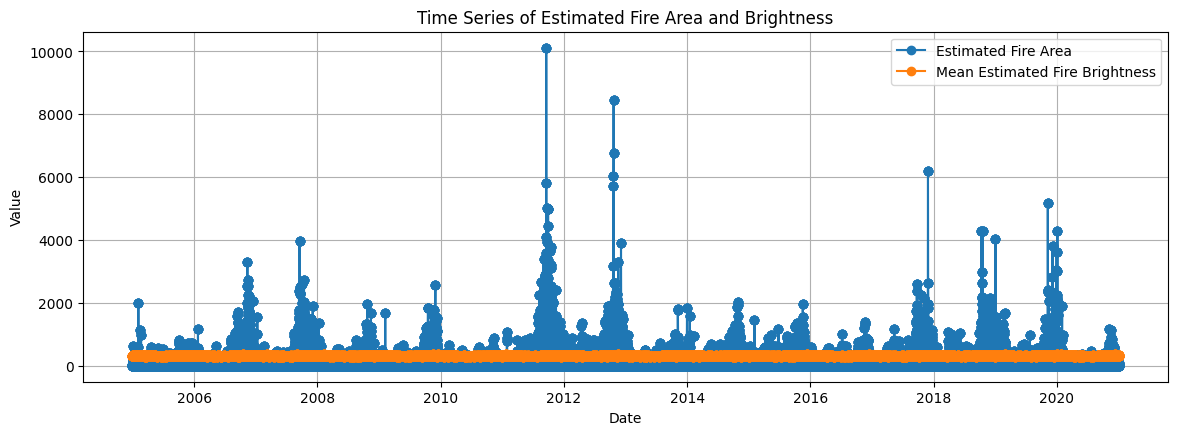

In [ ]:
# Set up the matplotlib figure
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))

# Plot time series of 'Estimated_fire_area' and 'Mean_estimated_fire_brightness' over time
plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['Estimated_fire_area'], marker='o', label='Estimated Fire Area')
plt.plot(merged_df['Date'], merged_df['Mean_estimated_fire_brightness'], marker='o', label='Mean Estimated Fire Brightness')
plt.title('Time Series of Estimated Fire Area and Brightness')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

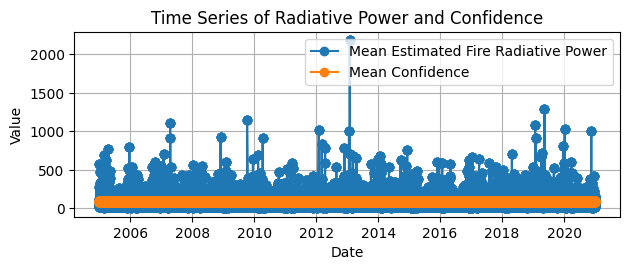

In [ ]:
# Plot time series of 'Mean_estimated_fire_radiative_power' and 'Mean_confidence' over time
plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['Mean_estimated_fire_radiative_power'], marker='o', label='Mean Estimated Fire Radiative Power')
plt.plot(merged_df['Date'], merged_df['Mean_confidence'], marker='o', label='Mean Confidence')
plt.title('Time Series of Radiative Power and Confidence')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

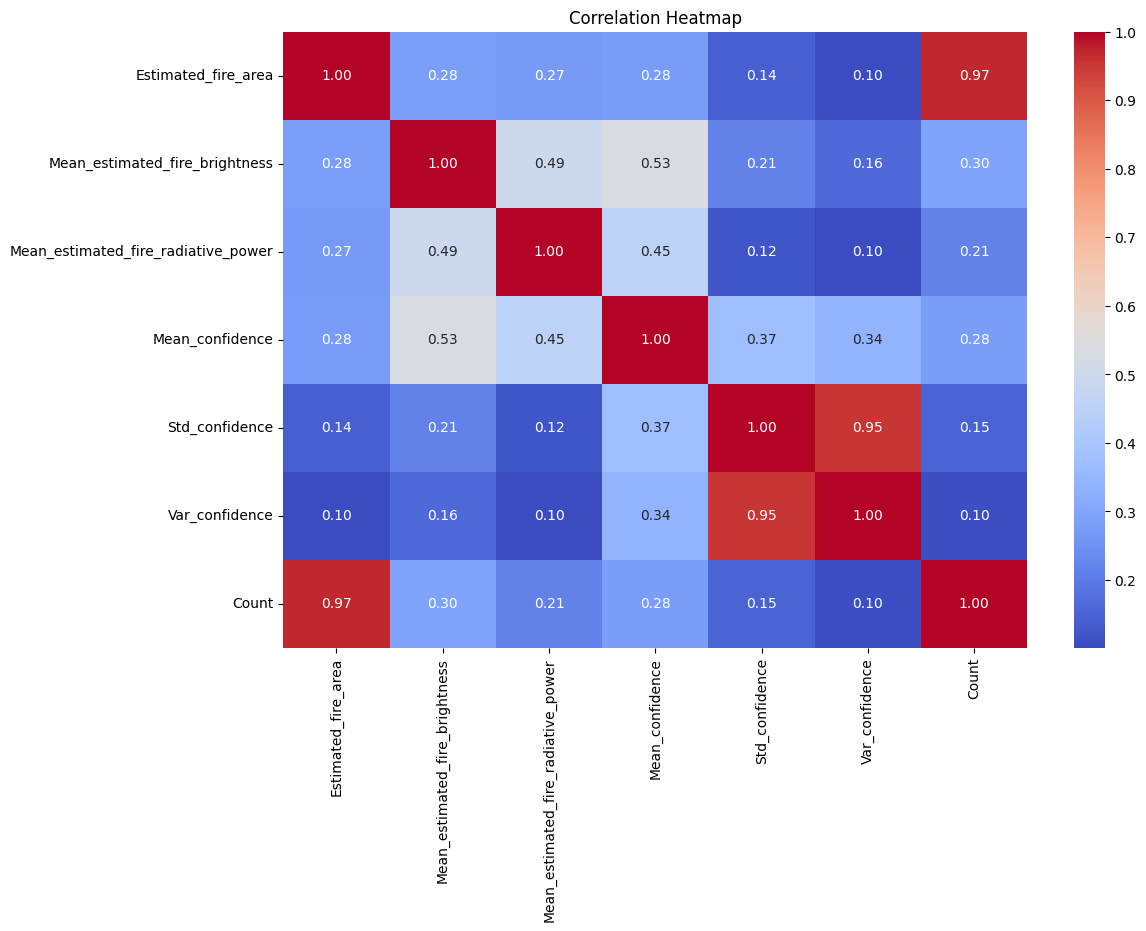

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = merged_df[['Estimated_fire_area', 'Mean_estimated_fire_brightness',
                                'Mean_estimated_fire_radiative_power', 'Mean_confidence',
                                'Std_confidence', 'Var_confidence', 'Count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

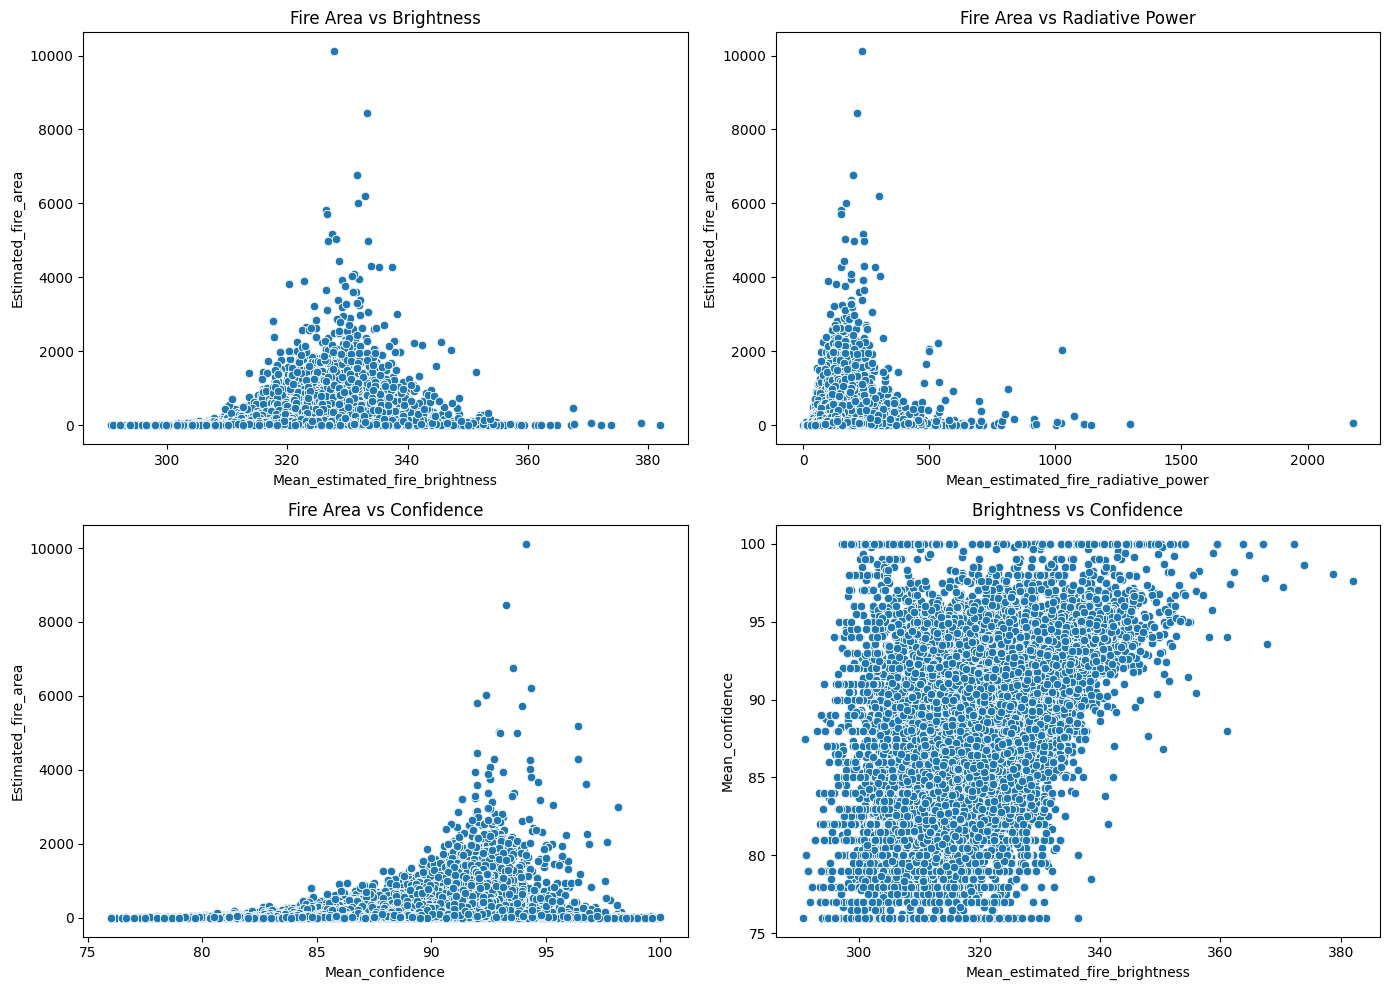

In [ ]:
# Scatter plots
plt.figure(figsize=(14, 10))

# Scatter plot of 'Estimated_fire_area' vs 'Mean_estimated_fire_brightness'
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_df, x='Mean_estimated_fire_brightness', y='Estimated_fire_area')
plt.title('Fire Area vs Brightness')

# Scatter plot of 'Estimated_fire_area' vs 'Mean_estimated_fire_radiative_power'
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_df, x='Mean_estimated_fire_radiative_power', y='Estimated_fire_area')
plt.title('Fire Area vs Radiative Power')

# Scatter plot of 'Estimated_fire_area' vs 'Mean_confidence'
plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_df, x='Mean_confidence', y='Estimated_fire_area')
plt.title('Fire Area vs Confidence')

# Scatter plot of 'Mean_estimated_fire_brightness' vs 'Mean_confidence'
plt.subplot(2, 2, 4)
sns.scatterplot(data=merged_df, x='Mean_estimated_fire_brightness', y='Mean_confidence')
plt.title('Brightness vs Confidence')

plt.tight_layout()
plt.show()

In [ ]:
# Pivot weather parameters into separate columns for each region and date
weather_pivoted = merged_df.pivot_table(
    index=["Date", "Region"],
    columns="Parameter",
    values=["mean()", "min()", "max()", "variance()"]
).reset_index()


In [ ]:
# Flatten the multi-level columns for better usability
weather_pivoted.columns = [
    f"{col[1]}_{col[0]}" if col[1] else col[0] for col in weather_pivoted.columns
]

In [ ]:
# Merge the pivoted weather data with fire-related metrics
fire_metrics = merged_df[
    [
        "Date",
        "Region",
        "Estimated_fire_area",
        "Mean_estimated_fire_brightness",
        "Mean_estimated_fire_radiative_power",
        "Mean_confidence",
    ]
].drop_duplicates()

aggregated_data = pd.merge(weather_pivoted, fire_metrics, on=["Date", "Region"], how="inner")

In [ ]:

# Create separate contexts for day and night
day_context = aggregated_data[['Date', 'Region', 'Temperature_max()', 'RelativeHumidity_max()',
                               'WindSpeed_max()', 'Precipitation_max()', 'SolarRadiation_max()',
                               'Temperature_mean()', 'RelativeHumidity_mean()', 'WindSpeed_mean()',
                               'Precipitation_mean()', 'SolarRadiation_mean()', 'SoilWaterContent_mean()',
                               'Temperature_variance()', 'RelativeHumidity_variance()', 'WindSpeed_variance()',
                               'Precipitation_variance()', 'SolarRadiation_variance()', 'SoilWaterContent_variance()']].copy()

night_context = aggregated_data[['Date', 'Region', 'Temperature_min()', 'RelativeHumidity_min()',
                                 'WindSpeed_min()', 'Precipitation_min()', 'SolarRadiation_min()',
                                 'Temperature_mean()', 'RelativeHumidity_mean()', 'WindSpeed_mean()',
                                 'Precipitation_mean()', 'SolarRadiation_mean()', 'SoilWaterContent_mean()',
                                 'Temperature_variance()', 'RelativeHumidity_variance()', 'WindSpeed_variance()',
                                 'Precipitation_variance()', 'SolarRadiation_variance()', 'SoilWaterContent_variance()']].copy()

# Add a 'Context' label to each (1 for Day, 0 for Night)
day_context = day_context.copy()
night_context = night_context.copy()

day_context.loc[:, 'Context'] = 'Day'
night_context.loc[:, 'Context'] = 'Night'


# Combine day and night contexts
context_data = pd.concat([day_context, night_context], axis=0)



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data for clustering
scaler = StandardScaler()
weather_scaled_day = scaler.fit_transform(day_context[['Temperature_max()', 'RelativeHumidity_max()',
                                                      'WindSpeed_max()', 'Precipitation_max()',
                                                      'SolarRadiation_max()']].fillna(0))

weather_scaled_night = scaler.fit_transform(night_context[['Temperature_min()', 'RelativeHumidity_min()',
                                                          'WindSpeed_min()', 'Precipitation_min()',
                                                          'SolarRadiation_min()']].fillna(0))

# Apply DBSCAN clustering for both contexts
dbscan_day = DBSCAN(eps=1.5, min_samples=10)  # Adjust eps and min_samples as needed
clusters_day = dbscan_day.fit_predict(weather_scaled_day)

dbscan_night = DBSCAN(eps=1.5, min_samples=10)  # Adjust eps and min_samples as needed
clusters_night = dbscan_night.fit_predict(weather_scaled_night)

# Assign the cluster labels back to the original dataset
day_context['CBFR_Cluster'] = clusters_day
night_context['CBFR_Cluster'] = clusters_night

# Merge back to the main dataset (for context-based risk score calculation)
aggregated_data = pd.concat([day_context, night_context], axis=0)


In [ ]:
# Define the list of features to be used for clustering
# Correct column names to match those in aggregated_data
features = [
    "Precipitation_mean()", "RelativeHumidity_mean()", "SoilWaterContent_mean()",
    "SolarRadiation_mean()", "Temperature_mean()", "WindSpeed_mean()",
    "Precipitation_variance()", "RelativeHumidity_variance()", "SoilWaterContent_variance()",
    "SolarRadiation_variance()", "Temperature_variance()", "WindSpeed_variance()"
]

# Check if all columns in 'features' are present in 'aggregated_data'
missing_cols = [col for col in features if col not in aggregated_data.columns]
if missing_cols:
    print(f"The following columns are missing in aggregated_data: {missing_cols}")
else:
    # Standardize the features
    scaler = StandardScaler()
    weather_scaled = scaler.fit_transform(aggregated_data[features].fillna(0))


In [ ]:
# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan.fit_predict(weather_scaled)

In [ ]:
# Add cluster labels to the dataset
aggregated_data["CBFR_Cluster"] = clusters

In [ ]:
# Compute Mahalanobis distance for anomaly detection
def mahalanobis_distance(x, data, cov_inv):
    mean_diff = x - np.mean(data, axis=0)
    return np.sqrt(np.dot(np.dot(mean_diff, cov_inv), mean_diff.T))

In [ ]:

# Initialize the CBFR_Risk_Score column as a float
aggregated_data["CBFR_Risk_Score"] = -1.0  # Use -1.0 instead of -1

# Compute distances for each data point in each cluster
unique_clusters = set(clusters)
for cluster_id in unique_clusters:
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_data = weather_scaled[clusters == cluster_id]

    # Calculate covariance matrix
    cov_matrix = np.cov(cluster_data, rowvar=False)

    # Add a small value to the diagonal to make it invertible (regularization)
    cov_matrix = cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-6

    # Calculate inverse of the covariance matrix
    cov_inv = np.linalg.inv(cov_matrix)

    distances = np.array([mahalanobis_distance(x, cluster_data, cov_inv) for x in cluster_data])
    # Assign distances to the corresponding rows
    aggregated_data.loc[aggregated_data["CBFR_Cluster"] == cluster_id, "CBFR_Risk_Score"] = distances

In [ ]:
# Normalize CBFR Risk Scores for interpretability (0 to 1 scale)
aggregated_data["CBFR_Risk_Score"] = (
    aggregated_data["CBFR_Risk_Score"] - aggregated_data["CBFR_Risk_Score"].min()
) / (aggregated_data["CBFR_Risk_Score"].max() - aggregated_data["CBFR_Risk_Score"].min())



In [ ]:
import joblib

# Save CBFR Model & Scaler
joblib.dump(dbscan, "CBFR_DBSCAN_Model.pkl")
joblib.dump(scaler, "CBFR_Scaler.pkl")

# Save CBFR risk scores independently
cbfr_output = aggregated_data[["Date", "Region", "CBFR_Risk_Score"]]
cbfr_output.to_csv("CBFR_Output.csv", index=False)

print("✅ CBFR Model Saved & Risk Scores Stored Independently!")


✅ CBFR Model Saved & Risk Scores Stored Independently!


In [ ]:
# Inspect updated dataset with CBFR Risk Scores
cbfr_info = aggregated_data[["Date", "Region", "CBFR_Cluster", "CBFR_Risk_Score"]].head()
cbfr_info

,Date,Region,CBFR_Cluster,CBFR_Risk_Score
0,2005-01-01,NT,-1,0.000000
1,2005-01-01,QL,0,0.267143
2,2005-01-01,WA,0,0.337781
3,2005-01-02,NT,6,0.163266
4,2005-01-02,QL,0,0.247347
